In [8]:
#importation données
import pandas as pd
path = (r"C:\Users\a\Desktop\Data Analysis\PROJETS\Airline Flight\airlines_flights_data.csv")
booking = pd.read_csv(path)
booking.tail()


,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


Nous avons des données qui détaillent les reservations de vols de différentes compagnies aériennes sur des vols entre des villes indiennes à un certain jours avant la date de départ. Les données sont enregistrées de manière structuré sur le site source.

Voici les caractéristiques présents dans le fichier.
- index : index de la ligne d'observation. l'index constitue une identifiant unique de chaque observation. C'est une variable numérique de type "nombre entier"
- airline : le nom de la compagnie aérienne qui desert le vol. C'est une variable catégorielle.
- flight : le numéro de vol selon chaque compagnie aérienne et chaque destination. C'est une variable catégorielle "
- source_city : la ville de départ. C'est une variable catégorielle.
- departure_time : la période de la journé de l'heure de départ. C'est une variable catégorielle constitué de 6 étiquettes uniques.
- stops : nombre de correspondane depuis la ville de départ à la ville d'arrivé finale. C'est une variable catégorielle. constitué de trois valeurs, "one", "two", "three" et sont stocké en type "texte". Ce variable est à transformer en "nombre entier" pour une meilleures analyse.
- arrival time : la période de la journé de l'heure d'arrivé à la destination finale. C'est une variable catégorielle constitué des mêmes étiquettes que la date de départ.
- destination_city : la ville de destination finale. C'et une variable catégorielle.
- class : la classe de réservation. C'est une variable catégorielle constitué par deux étiquettes, "Business" et "Economy"
- duration : la durée du vol en heure. C'est une variable flottant.
- days left : nombre de jours restant avant la date de départ. C'est une variable numérique de type "nombre entier"
- price : le prix du vol au jours de la validation de l'enregistrement. C'est une variable numérique de type "nombre décimal" (nombre à virgule flottante).

Le jeu de données est déjà nettoyé de base, seulement quelques vérifications classiques sera faites.

Nous allons essayer d'analyser si le prix varie selon :
- la compagnie aérienne
- la période de l'heure de départ
- la période de l'heure d'arrivé
- le nombre de correspondance
- la classe de reservation
- la durée totale du vol
- le nombre de jours entre la date d'achat du billet et le vol.

Avant, nous allons faire une analyse exploratoire des données.

### 1. Verification pour nettoyage des données et Analyse exploratoire

In [9]:
print(booking.isna().sum())

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [10]:
print(booking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [29]:

#Distinguer les variables numériques et les variables catégorielles
numerical_col  = list(booking.drop('index', axis=1).select_dtypes(include=['int','float']).columns)
print(numerical_col)
categorical_col = list(booking.select_dtypes(include=['object']).columns)
print(categorical_col)

['duration', 'days_left', 'price']
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [31]:
#Variable catégorielle : Identification des variables uniques et la fréquence de chaque valeur
for col in categorical_col :
    frequence = booking[col].value_counts(normalize=True)
    print(frequence, '\n')

airline
Vistara      0.425979
Air_India    0.269503
Indigo       0.143660
GO_FIRST     0.077204
AirAsia      0.053633
SpiceJet     0.030021
Name: proportion, dtype: float64 

flight
UK-706     0.010778
UK-772     0.009132
UK-720     0.008829
UK-836     0.008469
UK-822     0.008222
             ...   
6E-2914    0.000003
G8-107     0.000003
SG-9974    0.000003
6E-865     0.000003
SG-8339    0.000003
Name: proportion, Length: 1561, dtype: float64 

source_city
Delhi        0.204372
Mumbai       0.202883
Bangalore    0.173448
Kolkata      0.154411
Hyderabad    0.135951
Chennai      0.128934
Name: proportion, dtype: float64 

departure_time
Morning          0.237032
Early_Morning    0.222520
Evening          0.216896
Night            0.159968
Afternoon        0.159232
Late_Night       0.004351
Name: proportion, dtype: float64 

stops
one            0.835784
zero           0.119952
two_or_more    0.044264
Name: proportion, dtype: float64 

arrival_time
Night            0.304971
Evening     

<Figure size 640x480 with 0 Axes>

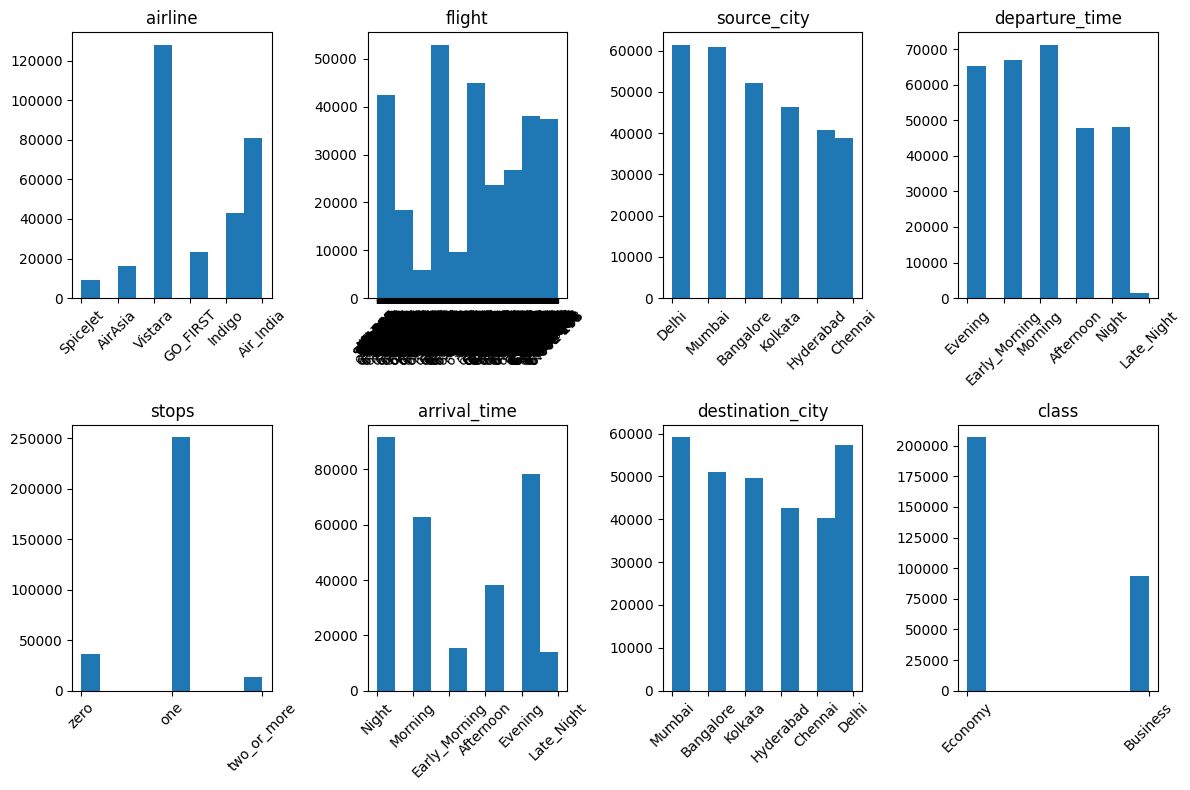

In [50]:
 #Graphique de distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.clf()
fig, ax = plt.subplots(2, 4, figsize=(12,8))

for i in range (2) :
    for j in range (4) :
        if i == 0 :
            k = 0
        else :
            k = 3
        
        caracteristique = categorical_col[i+j+k]
    
        ax[i][j].hist(booking[caracteristique])
        ax[i][j].tick_params(axis='x', rotation=45)
        ax[i][j].set_title(caracteristique)
        plt.tight_layout()

**Interpretation des figures**
- airline :  
    Sur l'ensemble des données, la compagnie aérienne **Vistara** possède le plus grand nombre d'enregistrement avec 42% des enregistrement suivi par Air India et Idigo avec respectivement 26% et 14% des enregistrements
- fligth :   
    Les vols sont biens réparties, aucun numéro de vol prédomine malgré le vol **UK-706** de la compagnie Vistara qui occupe les 1% des vols.
- source_city :  
    Les deux premières places sont partagées presque équitablement entre **Dehli** et **Mumbai** avec 20,4 % pour Dehli et 0,02 point en moins pour Mumbai. Bangalore se trouve à la troisième place avec 17% des vols.
- departure_time :  
    La plupart des vols partent dans la matiné  "**Morning**" avec 23% des vols. Ensuite plus tôt en début de matiné, il y a 22% des vols qui partent à cet période, et enfin 21% parte dans la soirée. Nous n'avons pas l'heure exacte pour chaque période
- arrival_time :  
    La plupart des vols arrivent dans la nuit "**Night**" qui représentent 30% des attérissage. Vient ensuite les arrivés dans la soirée avec 26% et les attérissages dans le matin avec 20%.
- destination_city :  
    Pour les villes de destinations, **Mumbai** et **Delhi** se trouvent êtes les destinations finales les plus deservis avec 19,68% pour le premier et 19,11% pour le deuxième. La troisième ville de destination avec 17% de part est Bangalore. 
- stops :  
    La plupart des vols font une escale sur une ville. Les vols avec un escale "**one**"  représentent 83% sur tous les vols, suivi par les vol sans escale qui représentent 11% et enfin les vols avec au moins deux escale qui représente le reste des vols sur l'ensemble des observations.
- class :  
    Enfin, pour les deux classes de reservations ce qui est logique, la plupart des ventes de billet sont de la classe économique "**Economy**" avec 68% des ventes, et le reste 31% la classe affaire "Business"






In [33]:
#Variable numérique : résumé statistique
for col in numerical_col :
    description = booking[col].describe().round(2)
    print(description, '\n')

count    300153.00
mean         12.22
std           7.19
min           0.83
25%           6.83
50%          11.25
75%          16.17
max          49.83
Name: duration, dtype: float64 

count    300153.00
mean         26.00
std          13.56
min           1.00
25%          15.00
50%          26.00
75%          38.00
max          49.00
Name: days_left, dtype: float64 

count    300153.00
mean      20889.66
std       22697.77
min        1105.00
25%        4783.00
50%        7425.00
75%       42521.00
max      123071.00
Name: price, dtype: float64 



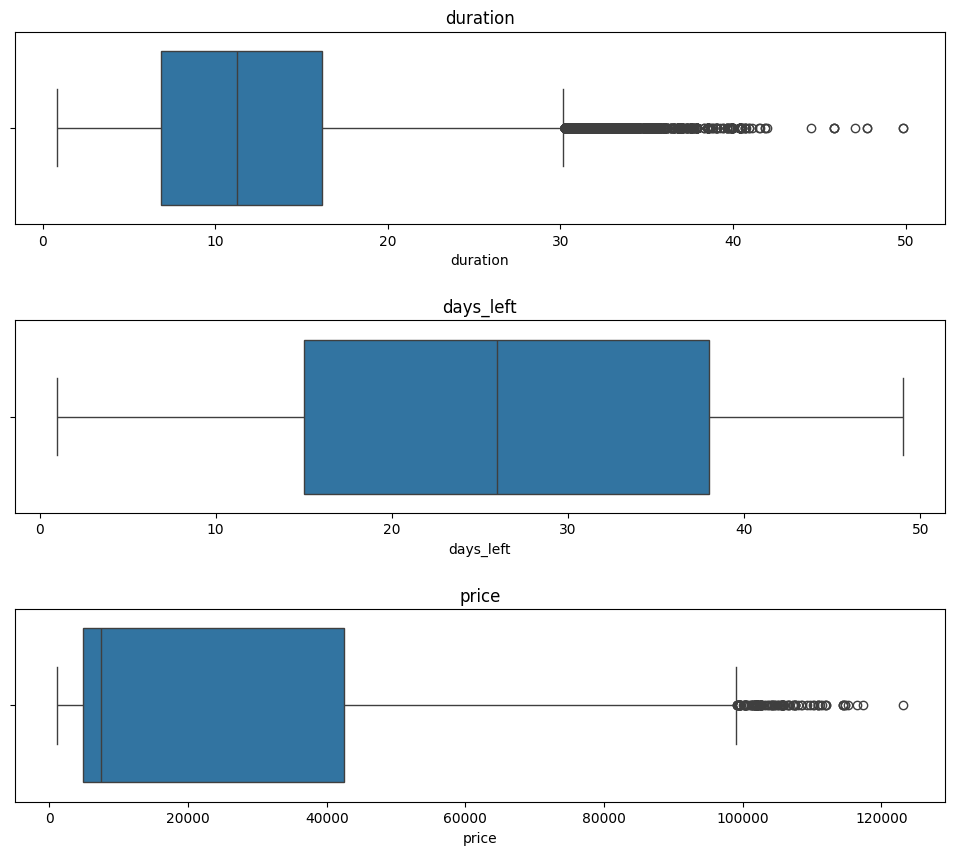

In [67]:
#Variable numérique : boxplot
fig, ax = plt.subplots(3,1, figsize = (12,10))

for i in range (3) :
    caracteristique = numerical_col[i]
    sns.boxplot(data=booking, x=caracteristique, ax=ax[i])
    ax[i].set_title(caracteristique)
    plt.subplots_adjust(hspace=0.5)

